In [1]:
import sys, os
sys.path.append('../src')
import numpy as np
from U1Funcs import NuRates, dRdEU1FI, DMvRatesGen, dRdEU1KineticMxing
from WIMPFuncs import C_SI
from Params import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy import interpolate

In [2]:
ne = 7 # number of energy bins
E_th = 0.5e0*1e-6 # Threshold
E_max = 4e0*1e-6 # Max recoil energy
Nuc = Xe131

In [3]:
selListDMN=np.array([0,1,3])
selListDMe=np.array([1,3])

In [4]:
nuGen = NuRates(E_th,E_max,ne,Nuc)
temp = nuGen.vRatesSM(selListDMN)
RvNSM = np.sum(temp[0],axis=0)

[['0' 'hep']
 ['1' '8B']
 ['2' 'DSNB']
 ['3' 'Atm']
 ['4' 'Reactor']]


In [5]:
modelParaList = [[np.log10(2e-5),np.log10(30e-3),1,1,1],\
    [np.log10(4e-5),np.log10(20e-3),1/3,1/3,-1], [np.log10(8e-4),np.log10(16e-3),[0,1,-1]]]

def vNSpectrumGen(mode, modelPara):
    if mode=='FI':
        temp = nuGen.vRatesFIGen(dRdEU1FI,modelPara,selListDMN)
    else:
        temp = nuGen.vRatesFDGen(dRdEU1KineticMxing, \
                                modelPara,selListDMN)
    return np.sum(temp, axis=0)
    
RvNUniversal, RvNBL, RvNLTau = vNSpectrumGen('FI', modelParaList[0]), vNSpectrumGen('FI', modelParaList[1]),\
                                vNSpectrumGen('FD', modelParaList[2])

In [6]:
RDMN = DMvRatesGen(np.array([5.5]), E_th, E_max, ne, Nuc, C_SI)[1][0]

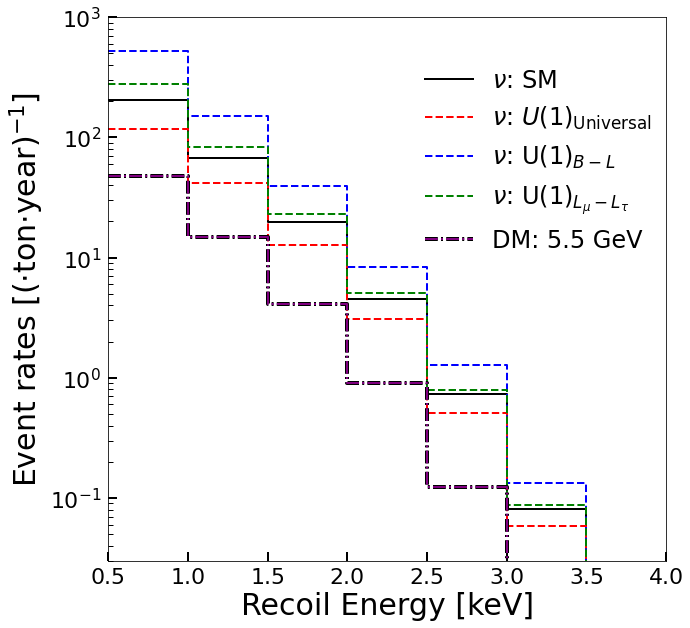

In [7]:
from U1PlotFuncs import line_background

fig, ax = plt.subplots(figsize=(10,10))

nBins = len(RvNSM)
xMin, xMax = E_th, E_max
StatX = np.linspace(xMin,xMax,nBins+1)*1e6
DatX = np.array(list(map(lambda x: [x,x], StatX[1:-1]))).flatten()
DatX = np.append([StatX[0]], np.append(DatX, [StatX[-1]]))
def datYGen(dat):
    StatY = dat
    DatY = np.array(list(map(lambda x: [x,x], StatY))).flatten()
    return DatY

pek = line_background(4,'k')

ax.plot(DatX, datYGen(RvNSM), color='black', linestyle='-', linewidth=2,label=r'$\nu$: SM')
ax.plot(DatX, datYGen(RvNUniversal), color='r', linestyle='--',linewidth=2, label=r'$\nu$: $U(1)_{\rm Universal}$')
ax.plot(DatX, datYGen(RvNBL), color='b', linestyle='--',linewidth=2, label=r'$\nu$: U(1)$_{B-L}$')
ax.plot(DatX, datYGen(RvNLTau), color='g', linestyle='--',linewidth=2, label=r'$\nu$: U(1)$_{L_\mu-L_\tau}$')
ax.plot(DatX, datYGen(RDMN)*10**(45-45), color='purple', linestyle='-.',linewidth=2, label=r'DM: 5.5 GeV',path_effects=pek)

ax.set_yscale('log')

lfs = 30
ax.set_xlabel(r"Recoil Energy [keV]",fontsize=lfs)
ax.set_ylabel(r'Event rates [($\cdot$ton$\cdot$year)$^{-1}$]',fontsize=lfs)

ax.set_xlim([5e-1,4e0])
ax.set_ylim([3e-2,1e3])

ax.tick_params(which='major',direction='in',width=2,length=9,pad=7,labelsize=22)
ax.tick_params(which='minor',direction='in',width=1,length=5)
ax.legend(fontsize=24,frameon=True,loc=(0.55,0.55),framealpha=0)

In [8]:
myPathFig = os.path.join(os.path.abspath(os.path.pardir),'plots')
fig.savefig(os.path.join(myPathFig,"DMNSISpectrum"+'.pdf'),bbox_inches='tight')
fig.savefig(os.path.join(myPathFig,'png','DMNSISpectrum.png'),bbox_inches='tight')

In [9]:
E_th = 1*1e-2*1e-6 # Threshold
E_max = 8*1e-6 # Max recoil energy
# The energy transition function for CEvNS
myPath = os.path.join(os.path.abspath(os.path.pardir),'data','detection')
ERList, ionLow, ionFiducial, ionHigh = np.loadtxt(os.path.join(myPath,'ionXenonDat.csv'),delimiter=',')
neERFunc = np.vectorize(interpolate.interp1d(ERList,ionFiducial))
# DM-electron Rates
temp = np.loadtxt(os.path.join(myPath,'DMElectronStandard.csv'),delimiter=',')
mDMList = temp[:,0]
DMElectronStandardList = temp[:,1:11]
thresholdBin=3

In [10]:
nuGen = NuRates(E_th,E_max,ne,Nuc)
RNuSM = nuGen.vRatesFIGenLow(dRdEU1FI, [], neERFunc, selListDMe)
RNuSM = np.sum(RNuSM,axis=0)

def vNSpectrumGen2(mode, modelPara):
    if mode=='FI':
        temp = nuGen.vRatesFIGenLow(dRdEU1FI, modelPara, neERFunc, selListDMe)
    else:
        temp = nuGen.vRatesFDGenLow(dRdEU1KineticMxing, modelPara, neERFunc, selListDMe)
    return np.sum(temp,axis=0)

RvNUniversal, RvNBL, RvNLTau = vNSpectrumGen2('FI', modelParaList[0]), vNSpectrumGen2('FI', modelParaList[1]),\
                                vNSpectrumGen2('FD', modelParaList[2])

[['0' 'pep']
 ['1' 'hep']
 ['2' '7Be2']
 ['3' '8B']
 ['4' '13N']
 ['5' '15O']
 ['6' '17F']
 ['7' 'DSNB']
 ['8' 'Atm']
 ['9' 'GeoU']
 ['10' 'GeoTh']
 ['11' 'GeoK']
 ['12' 'Reactor']]


In [11]:
def DMeSpectrumGen(mDM,mDMList,DMElectronStandardList):
    mi = np.argmin(np.abs(mDMList-mDM))
    print(mDMList[mi])
    return DMElectronStandardList[mi]

sigma0Plot = 2e-42
RWIMP100 = DMeSpectrumGen(0.1,mDMList,DMElectronStandardList)*sigma0Plot
RWIMP60 = DMeSpectrumGen(60e-3,mDMList,DMElectronStandardList)*sigma0Plot

0.10232929922807542
0.0588843655355589


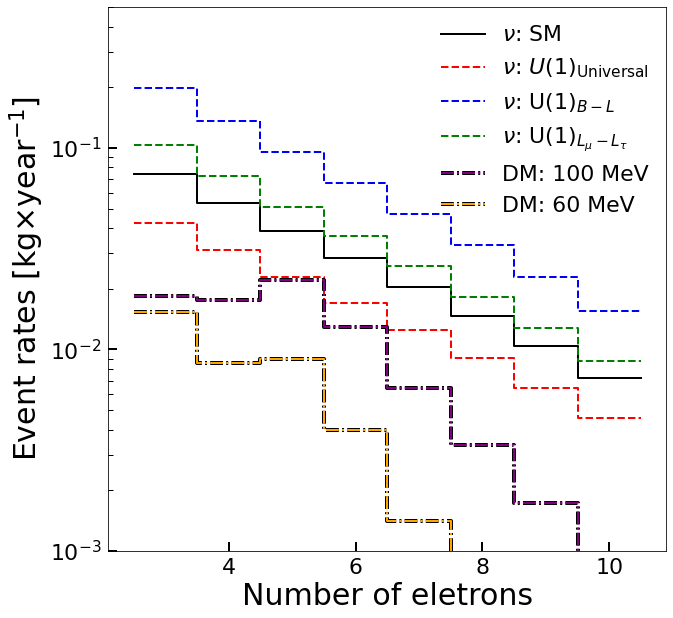

In [12]:
fig, ax = plt.subplots(figsize=(10,10))
nBins = len(RNuSM[2:])
xMin, xMax = 10+0.5-nBins, 10+0.5
StatX = np.linspace(xMin,xMax,nBins+1)
DatX = np.array(list(map(lambda x: [x,x], StatX[1:-1]))).flatten()
DatX = np.append([StatX[0]], np.append(DatX, [StatX[-1]]))
def datYGen(dat):
    StatY = dat[2:]
    DatY = np.array(list(map(lambda x: [x,x], StatY))).flatten()
    return DatY


pek = line_background(4,'k')
ax.plot(DatX, datYGen(RNuSM), color='black', linestyle='-', linewidth=2,label=r'$\nu$: SM')
ax.plot(DatX, datYGen(RvNUniversal), color='r', linestyle='--',linewidth=2, label=r'$\nu$: $U(1)_{\rm Universal}$')
ax.plot(DatX, datYGen(RvNBL), color='b', linestyle='--',linewidth=2, label=r'$\nu$: U(1)$_{B-L}$')
ax.plot(DatX, datYGen(RvNLTau), color='g', linestyle='--',linewidth=2, label=r'$\nu$: U(1)$_{L_\mu-L_\tau}$')
ax.plot(DatX, datYGen(RWIMP100), color='purple', linestyle='-.',linewidth=2, label=r'DM: 100 MeV',path_effects=pek)
ax.plot(DatX, datYGen(RWIMP60), color='orange', linestyle='-.',linewidth=2, label=r'DM: 60 MeV',path_effects=pek)

ax.set_yscale('log')

lfs = 30
ax.set_xlabel(r"Number of eletrons",fontsize=lfs)
ax.set_ylabel(r'Event rates [kg$\times$year$^{-1}$]',fontsize=lfs)

#ax.set_xlim([xMin-0.5,xMax+0.5])
ax.set_ylim([1e-3,5e-1])

ax.tick_params(which='major',direction='in',width=2,length=9,pad=7,labelsize=22)
ax.tick_params(which='minor',direction='in',width=1,length=5)
ax.legend(fontsize=22,frameon=True,loc=(0.58,0.6),framealpha=0)

In [13]:
myPathFig = os.path.join(os.path.abspath(os.path.pardir),'plots')
fig.savefig(os.path.join(myPathFig,"DMeConstantSpectrum"+'.pdf'),bbox_inches='tight')
fig.savefig(os.path.join(myPathFig,'png','DMeConstantSpectrum.png'),bbox_inches='tight')